# DRpy Example 3

- author: [Hamid Ali Syed](https://github.com/syedhamidali)
- date: Apr 18, 2023

In [10]:
import numpy as np
import h5py                  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# import netCDF4 as nc
import xarray as xr
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#install drpy
# !pip install git+https://github.com/dopplerchase/DRpy.git

In [3]:
import drpy
import datetime as dt

In [4]:
dt.datetime(2021,5,15,20,43)

datetime.datetime(2021, 5, 15, 20, 43)

## Create PPS account
create your PPS account here: 
https://registration.pps.eosdis.nasa.gov/registration/

## Download Data

In [ ]:
io = drpy.io.netrunner(servername='Research',username='XXXXXXX@XXXX.XXX',
                       start_time=datetime.datetime(2021,5,15,20,43),
                      end_time=datetime.datetime(2021,5,15,22,17))

In [5]:
file = '2A.GPM.DPR.V9-20211125.20210515-S204332-E221604.040979.V07A.HDF5'

## Read data

In [6]:
dpr = drpy.core.GPMDPR(filename=file)
# dpr.ds

In [12]:
start = 5550
end = 5630

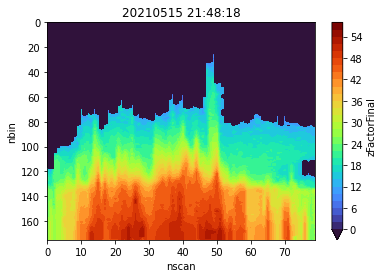

In [22]:
dpr.ds['zFactorFinal'].isel(nscan=slice(start,end),nfreq=1).max(dim='nrayNS').plot.contourf(x='nscan',
                                                                                            levels=range(0,60,2),
                                                                                           cmap='turbo')
plt.title(pd.to_datetime(dpr.ds['zFactorFinal'].isel(nscan=slice(start,end),nfreq=1).time[0,0].values).strftime(
    '%Y%m%d %H:%M:%S'))
plt.gca().invert_yaxis()

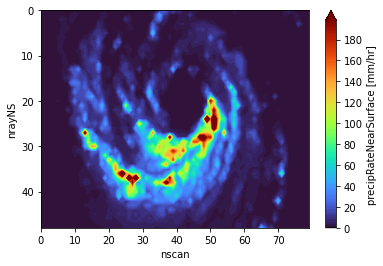

In [23]:
dpr.ds['precipRateNearSurface'][start:end,:].plot.contourf(x='nscan',levels=range(0,200,2),cmap='turbo')
plt.gca().invert_yaxis()

In [30]:
import cartopy.crs as ccrs
import cartopy.feature as feat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [32]:
def gline(ax):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, 
                         linestyle='--', draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right=False
    gl.xlines = False
    gl.ylines = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'weight': 'bold'}
    gl.ylabel_style = {'weight': 'bold'}

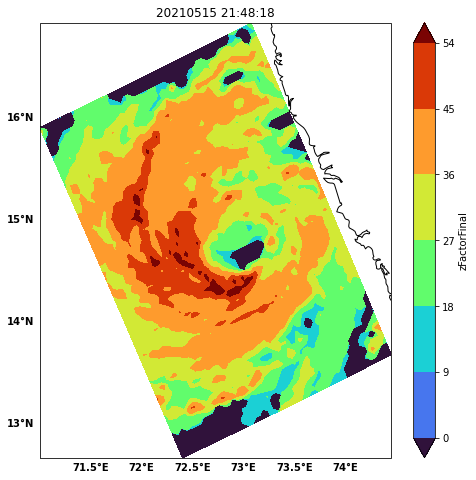

In [34]:
plt.figure(figsize=[8,8])
ax = plt.axes(projection=ccrs.PlateCarree())
dpr.ds['zFactorFinal'][start:end,:,:,0].max(axis=2).plot.contourf(x='Longitude',y='Latitude',levels=range(0,60,9),
                                                        cmap='turbo')
ax.set_title(pd.to_datetime(dpr.ds['zFactorFinal'][start:end,:,160,0].time[0,0].values).strftime('%Y%m%d %H:%M:%S'))
ax.coastlines()
gline(ax)